#### Carregamento de dados

In [1]:
%run bot_libraries.ipynb

In [2]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [3]:
%run tratamento_de_dados.ipynb

#### Gráfico 'Open', 'High', 'Low', 'Close'

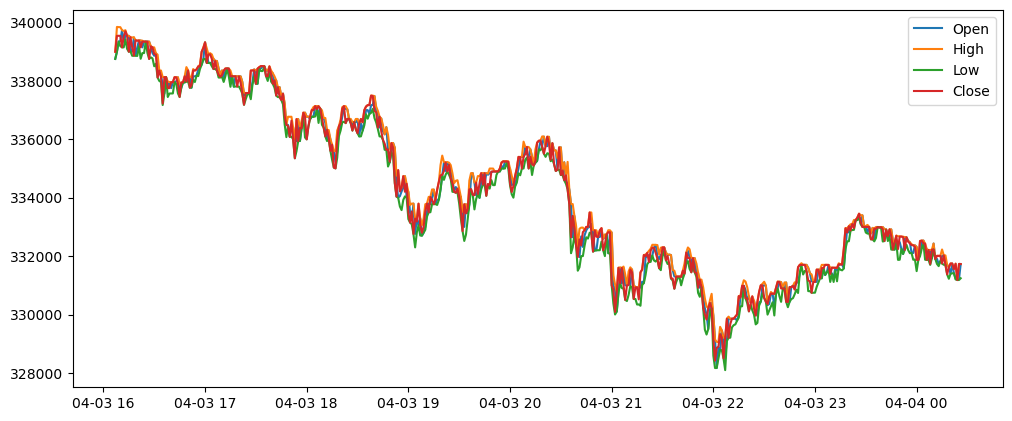

In [4]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

##### 5.1.10. MIDPRICE - Midpoint Price over period

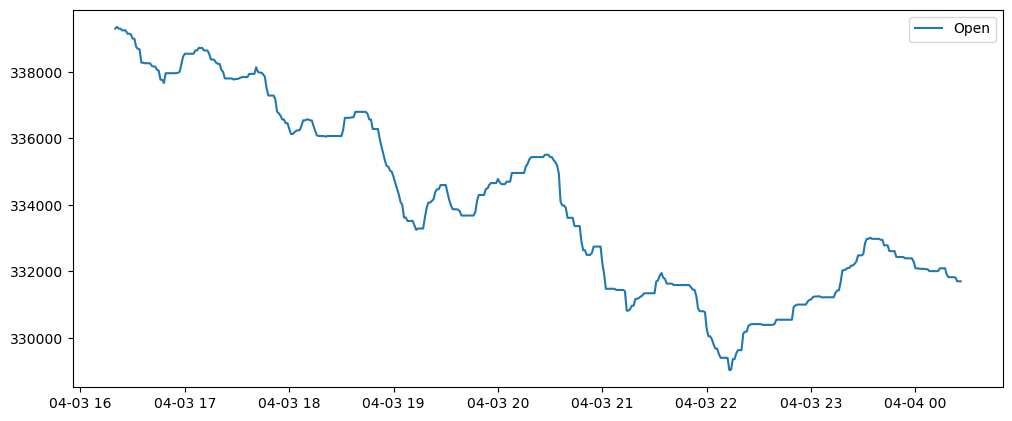

In [5]:
real = talib.MIDPRICE(high, low, timeperiod=14)
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, real)
plt.legend(line, data_0.columns)

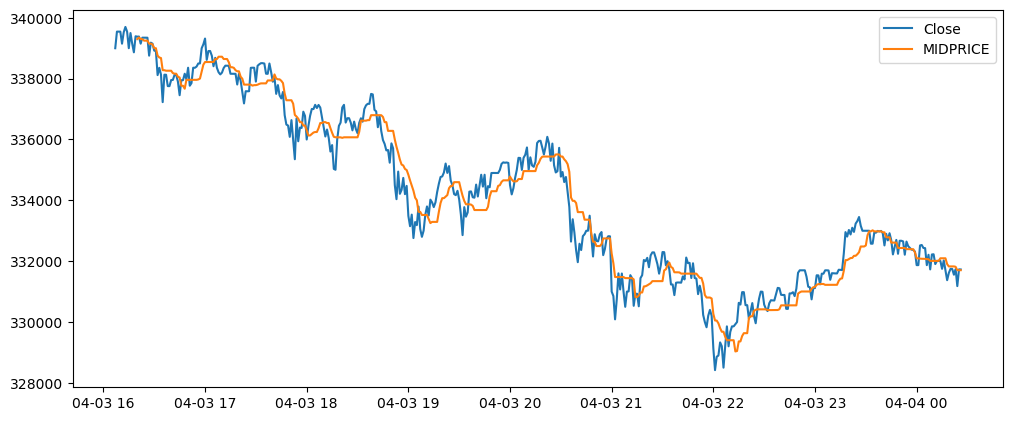

In [6]:
data_metric = pd.DataFrame({"MIDPRICE": real})

data_0 = data_metric[["MIDPRICE"]]
plt.figure(figsize=(12,5), dpi=100)



#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']
line_p = plt.plot(data_p.index, data_p)
# plt.legend(line_p, data_p.columns)


line = plt.plot(data_0.index, data_0)
plt.legend((*line_p, *line), (*data_p.columns, *data_0.columns))
plt.show()

#### Dataframe

In [7]:
data_metric = pd.DataFrame()
for i in range(len(data)):
    data_metric = data_metric.append({"Close": data['Close'][i], "MIDPRICE": real[i]}, ignore_index = True)

In [8]:
data_metric_drop = data_metric.dropna().reset_index(drop = True)
data_metric_drop

,Close,MIDPRICE
0,339380.0000000000,339302.5000000000
1,339384.0000000000,339353.0000000000
2,339150.0000000000,339301.5000000000
3,339347.0000000000,339300.5000000000
4,339347.0000000000,339249.5000000000
...,...,...
482,331555.0000000000,331827.5000000000
483,331740.0000000000,331816.0000000000
484,331181.0000000000,331704.0000000000
485,331732.0000000000,331704.0000000000


#### Loop de descisão de compra com a métrica escolhida